In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
sns.set()

In [4]:
toyota=pd.read_csv('downloads/ToyotaCorolla.csv',encoding='latin1')
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [11]:
toyota[toyota.duplicated()]

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar


In [5]:
toyota.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [8]:
toyota_2=pd.concat([toyota.iloc[:,2:4],toyota.iloc[:,6:7],toyota.iloc[:,8:9],toyota.iloc[:,12:14],toyota.iloc[:,15:18]],axis=1)
toyota_2.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [9]:
toyota_3=toyota_2.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
toyota_3.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [12]:
toyota_3[toyota_3.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [13]:
toyota_4=toyota_3.drop_duplicates().reset_index(drop=True)
toyota_4.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [14]:
toyota_4.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


<AxesSubplot:>

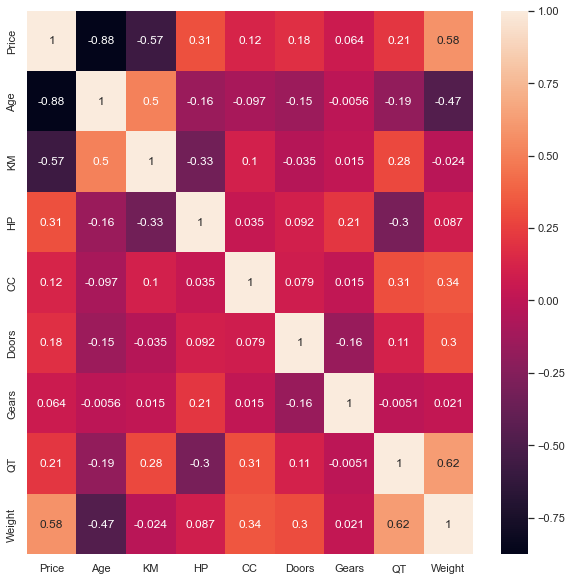

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(toyota_4.corr(),annot=True)

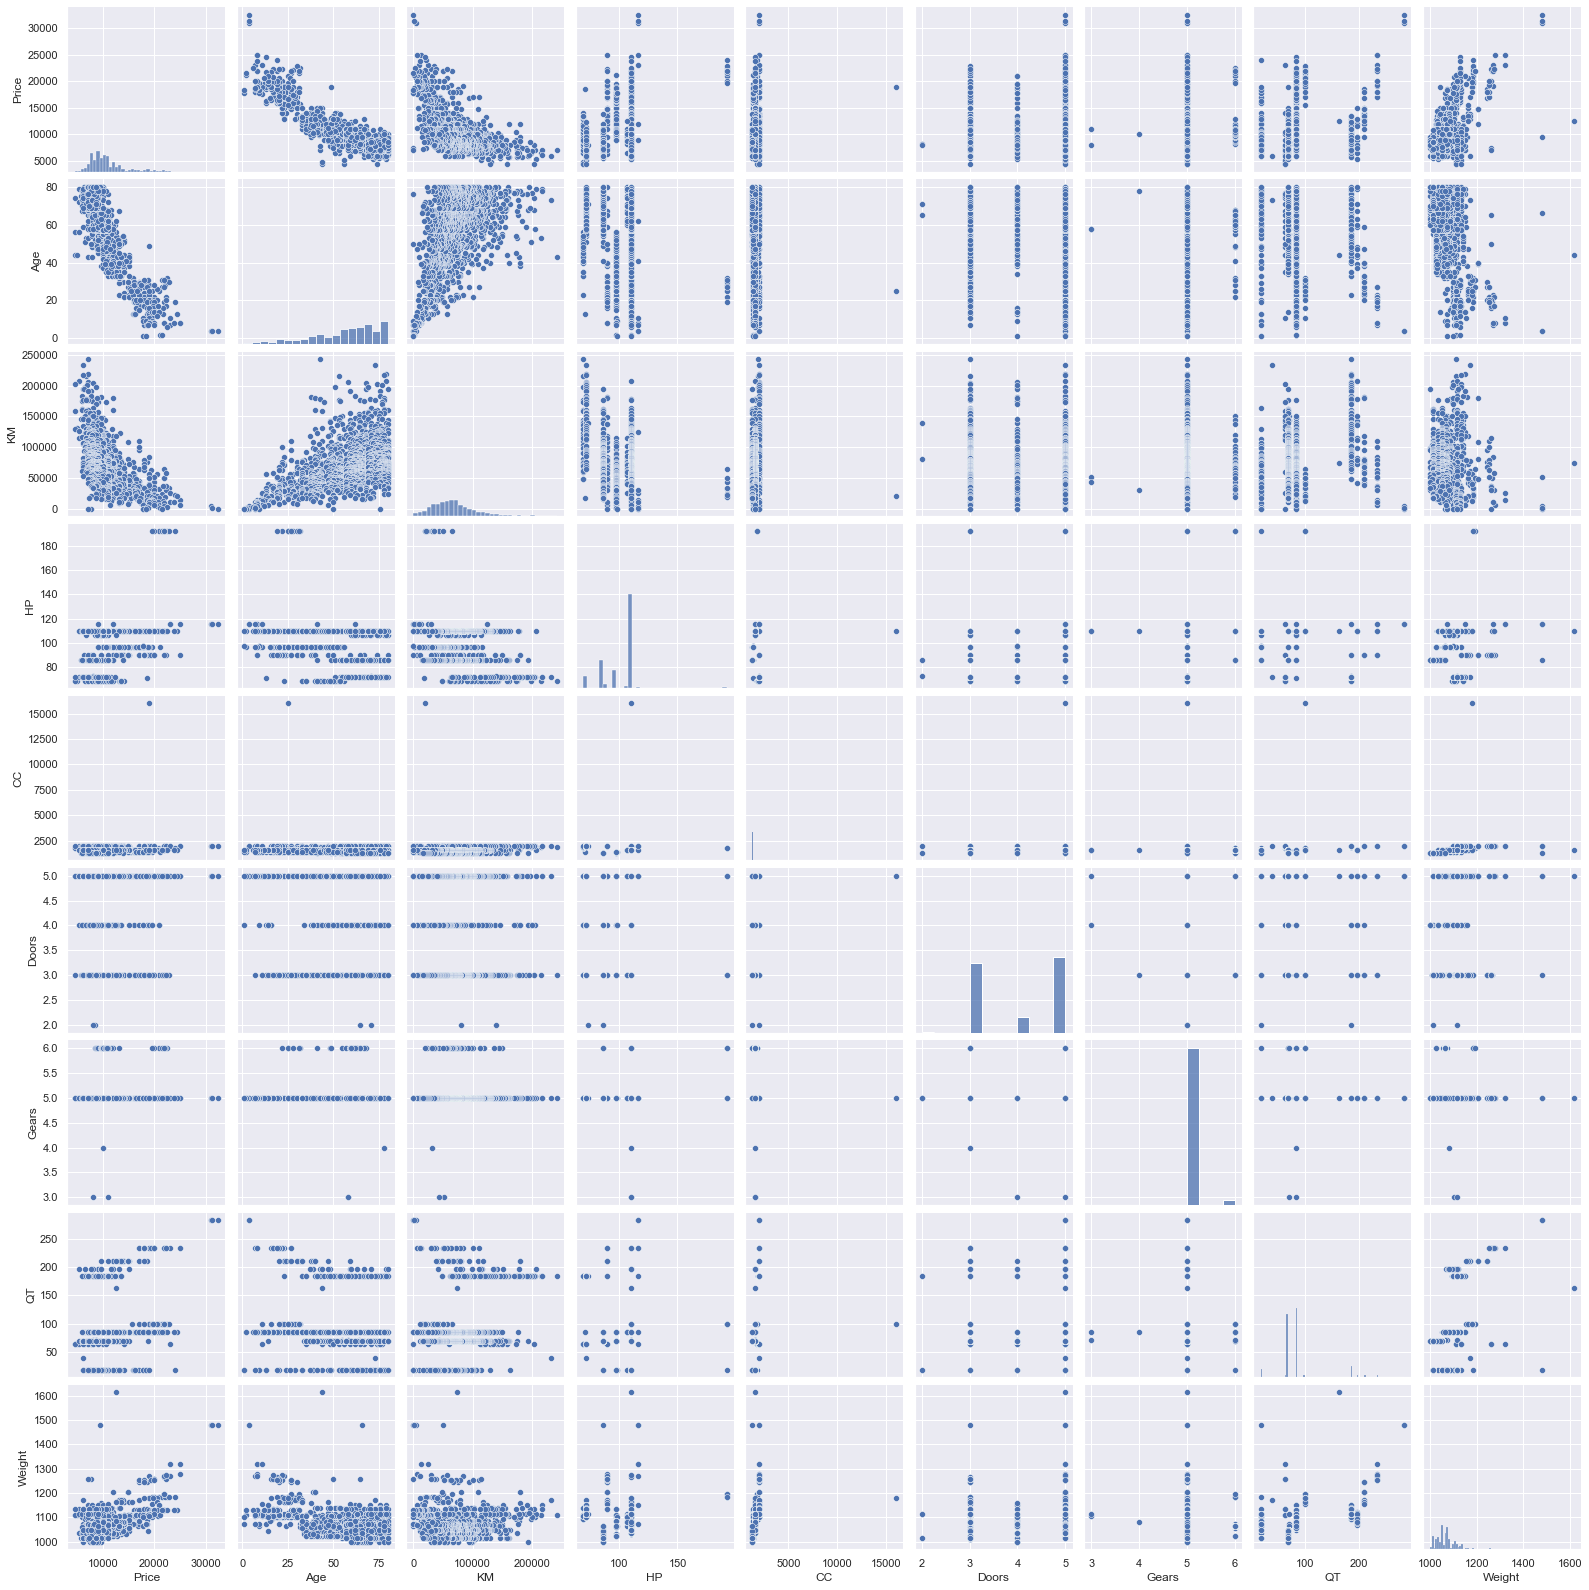

In [18]:
sns.pairplot(toyota_4)

In [19]:
model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyota_4).fit()

In [20]:
# Finding Coefficient parameters
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [21]:
# Finding tvalues and pvalues
model.tvalues , np.round(model.pvalues,5)

(Intercept    -3.875273
 Age         -46.551876
 KM          -16.552424
 HP           11.209719
 CC           -1.316436
 Doors        -0.023012
 Gears         3.034563
 QT            2.944198
 Weight       15.760663
 dtype: float64,
 Intercept    0.00011
 Age          0.00000
 KM           0.00000
 HP           0.00000
 CC           0.18824
 Doors        0.98164
 Gears        0.00245
 QT           0.00329
 Weight       0.00000
 dtype: float64)

In [22]:
# Finding rsquared values
model.rsquared , model.rsquared_adj 

(0.8625200256947, 0.8617487495415146)

In [23]:
# Build SLR and MLR models for insignificant variables 'CC' and 'Doors'
# Also find their tvalues and pvalues

In [25]:
slr_c=smf.ols('Price~CC',data=toyota_4).fit()
slr_c.tvalues , slr_c.pvalues

(Intercept    24.879592
 CC            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [26]:
slr_d=smf.ols('Price~Doors',data=toyota_4).fit()
slr_d.tvalues , slr_d.pvalues

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [28]:
mlr_cd=smf.ols('Price~CC+Doors',data=toyota_4).fit()
mlr_cd.tvalues , mlr_cd.pvalues

(Intercept    12.786341
 CC            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 CC           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

## Model Validation Techniques
## Two Techniques: 1. Collinearity Check & 2. Residual Analysis

In [29]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=toyota_4).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=toyota_4).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=toyota_4).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=toyota_4).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=toyota_4).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=toyota_4).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=toyota_4).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=toyota_4).fit().rsquared
vif_WT=1/(1-rsq_WT)

# Putting the values in Dataframe format
data_1={'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df=pd.DataFrame(data_1)
Vif_df

,Variables,Vif
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


In [30]:
# No variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

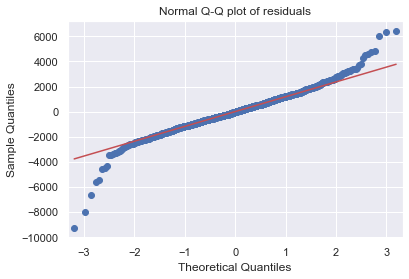

In [31]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
sm.qqplot(model.resid,line='q') # 'q' - A line is fit through the quartiles # line = '45'- to draw the 45-degree diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [32]:
list(np.where(model.resid>6000))  # outliar detection from above QQ plot of residuals

[array([109, 146, 522], dtype=int64)]

In [33]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

In [34]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

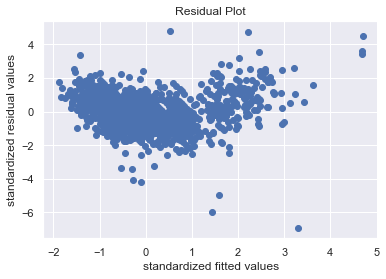

In [35]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

eval_env: 1


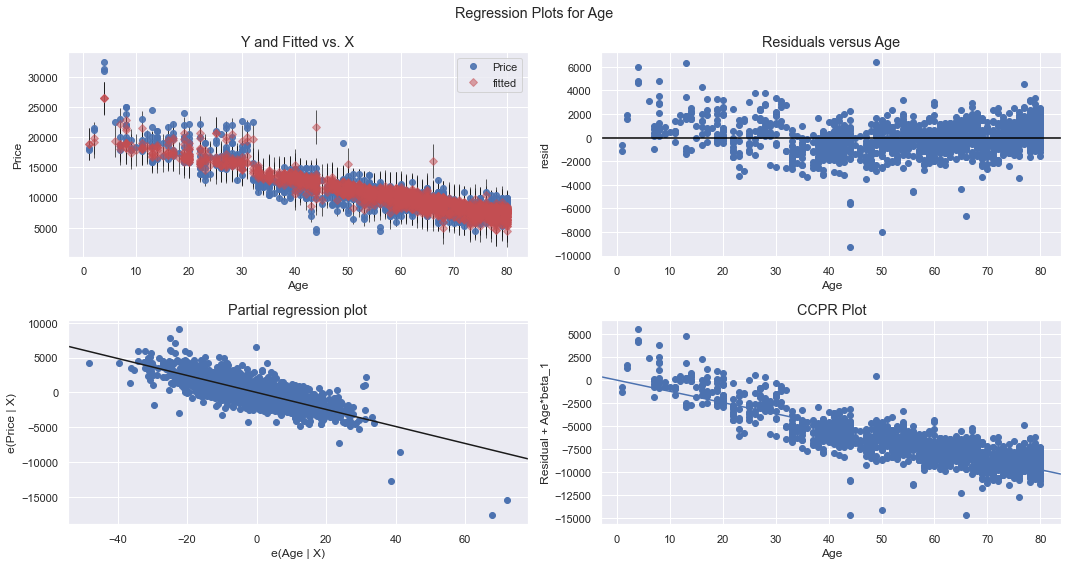

In [37]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

eval_env: 1


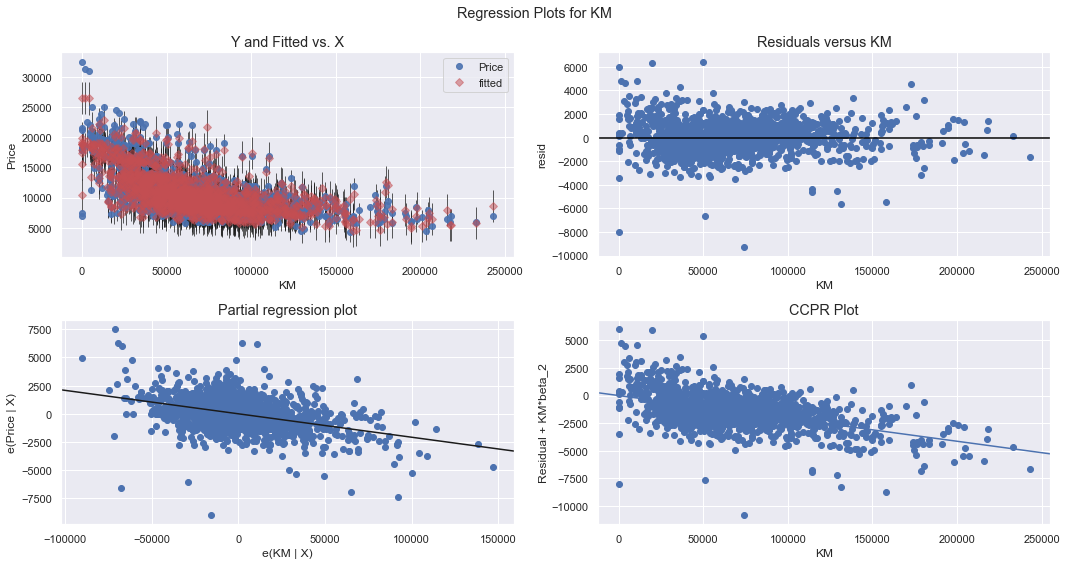

In [38]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

eval_env: 1


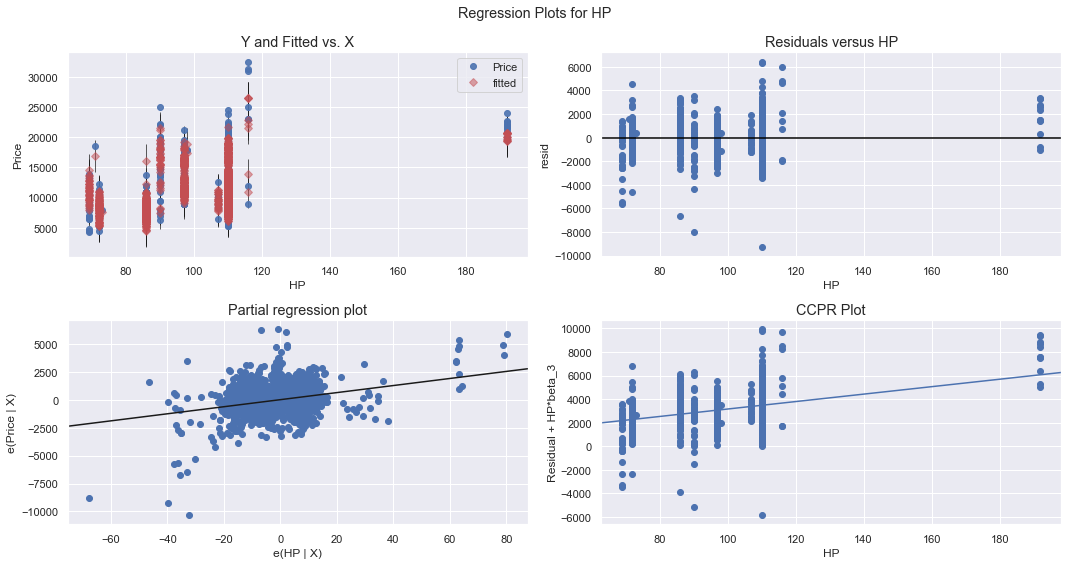

In [39]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

eval_env: 1


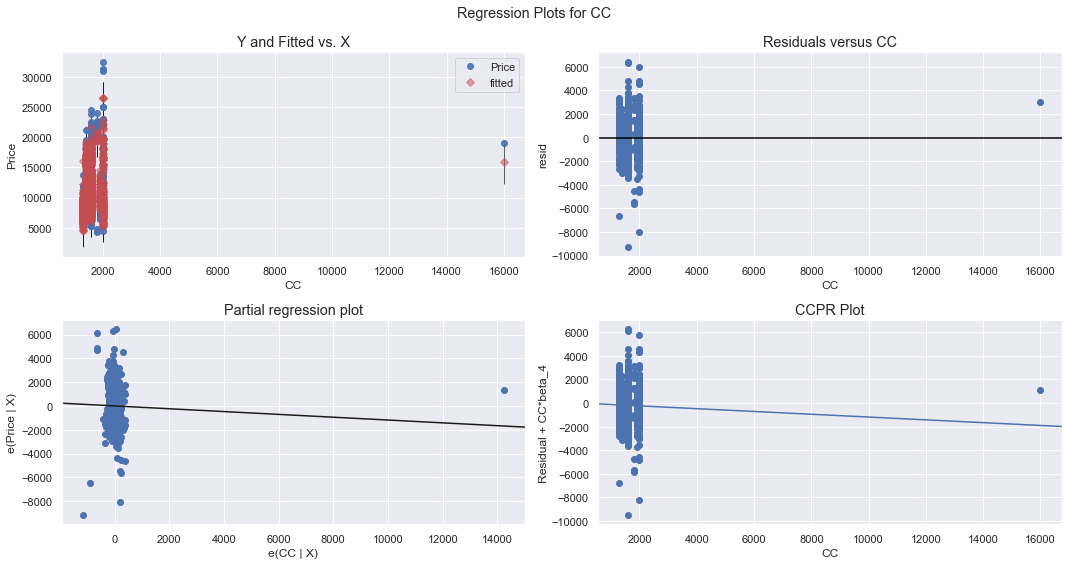

In [40]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()

eval_env: 1


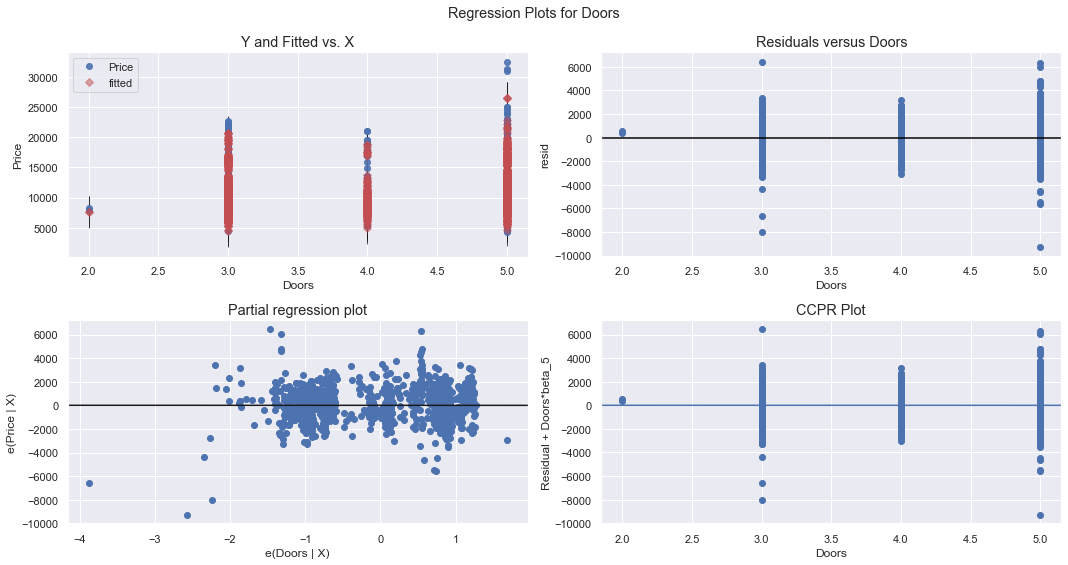

In [41]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

eval_env: 1


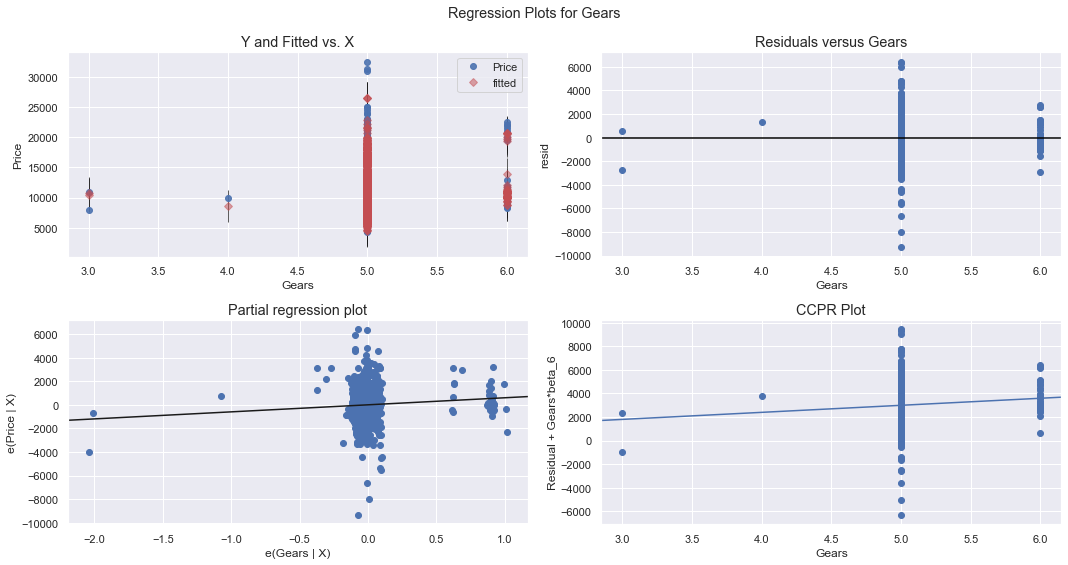

In [42]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

eval_env: 1


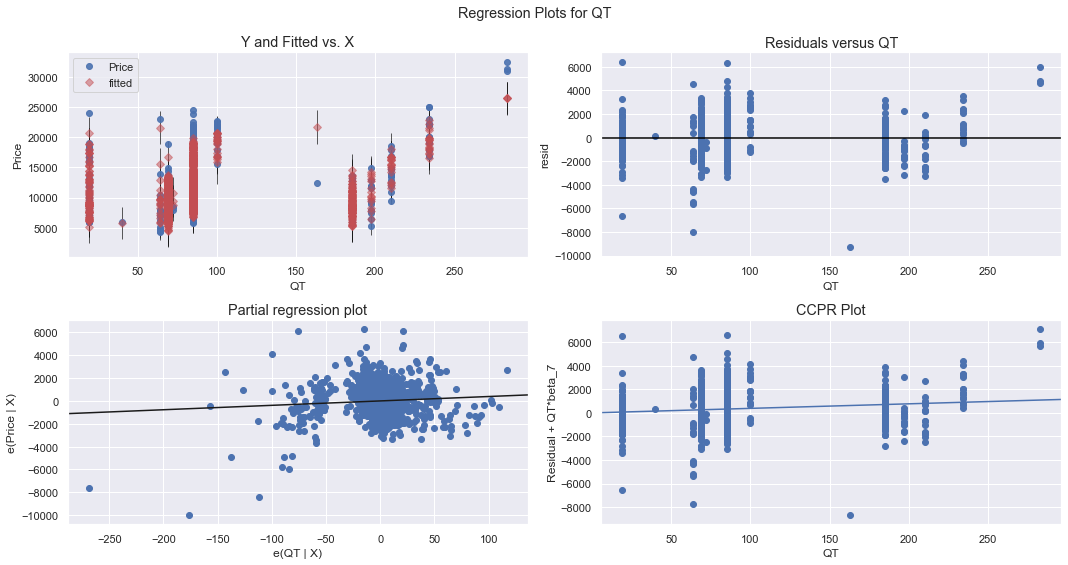

In [43]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'QT',fig=fig)
plt.show()

eval_env: 1


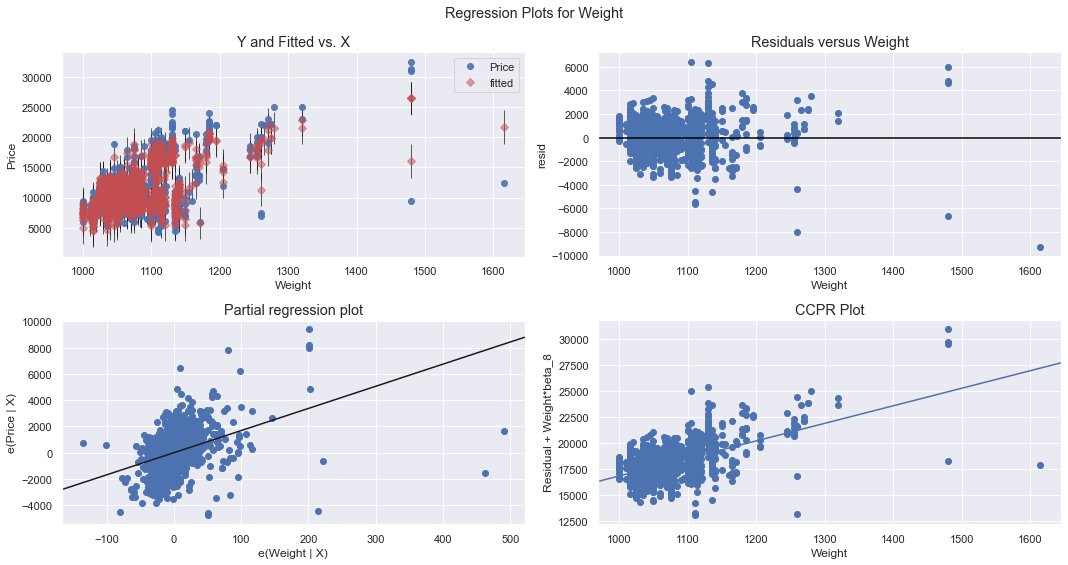

In [44]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

## Model Deletion Diagnostics (checking Outliers or Influencers)
## Two Techniques : 1. Cook's Distance & 2. Leverage value

1. Cook's Distance: If Cook's distance > 1, then it's an outlier
Get influencers using cook's distance

In [45]:
(c,_)=model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110551e-07, 6.99854767e-04, 1.08408002e-02])

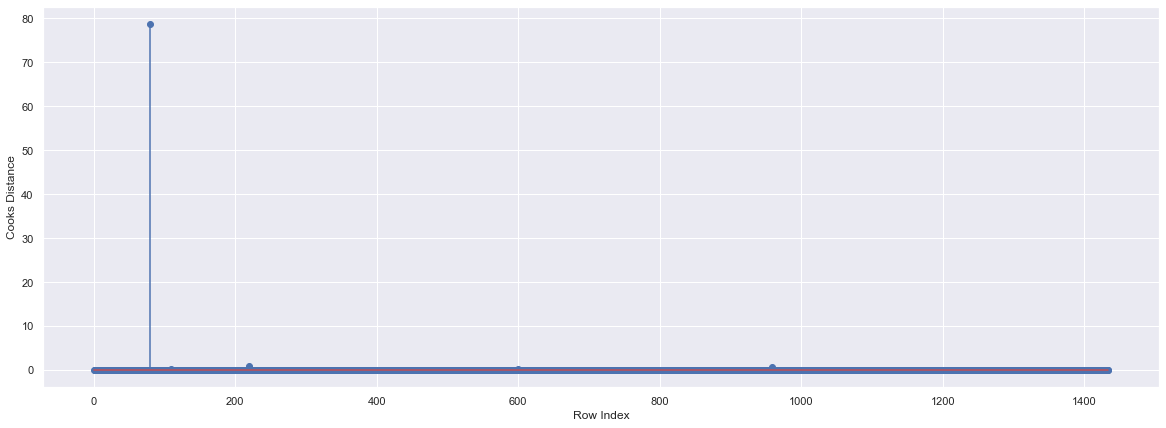

In [47]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(toyota_4)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [48]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(80, 78.72950582257265)

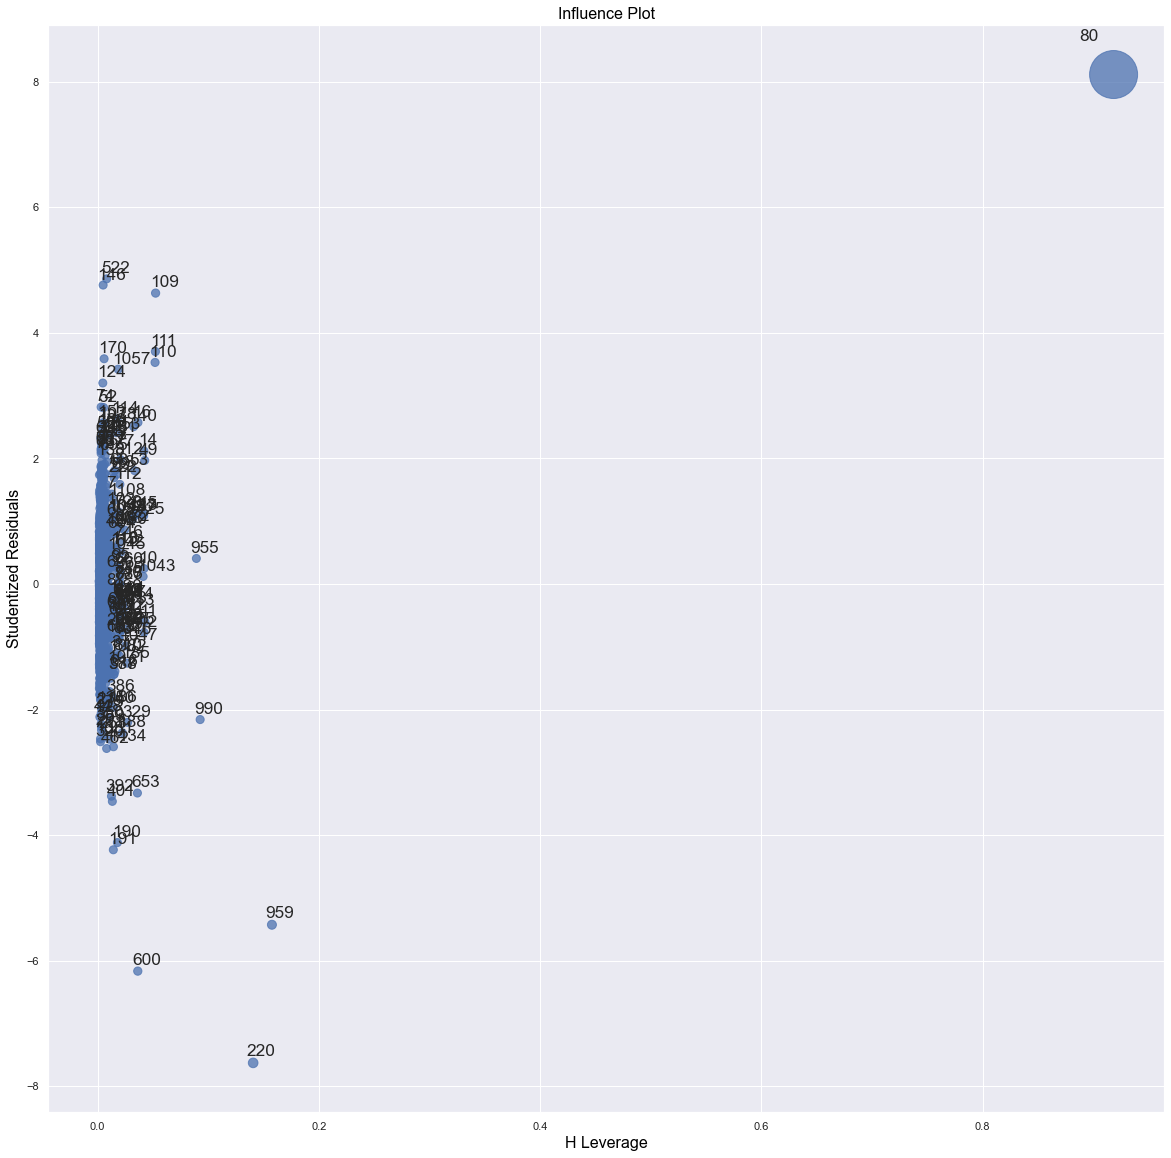

In [49]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ax)

In [51]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=toyota_4.shape[1]
n=toyota_4.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [52]:
toyo4[toyota_4.index.isin([80])] 

NameError: name 'toyo4' is not defined

In [54]:
# Creating a copy of data so that original dataset is not affected
toyo_new=toyota_4.copy()
toyo_new.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [55]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
toyota_5=toyo_new.drop(toyo_new.index[[80]],axis=0).reset_index(drop=True)
toyota_5.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [56]:
toyota_5.shape

(1434, 9)

## Model Deletion Diagnostics and Final Model

In [57]:
 while np.max(c)>0.5 :
    model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyota_5).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    toyota_5=toyota_5.drop(toyota_5.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    toyota_5
else:
    final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyota_5).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8882395145171204


In [58]:
final_model.rsquared , final_model.aic

(0.8882395145171204, 24382.707627340686)

In [59]:
toyota_5.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [60]:
# New data for prediction
new_data=pd.DataFrame({'Age':20,"KM":40300,"HP":100,"CC":1250,"Doors":4,"Gears":5,"QT":69,"Weight":1050},index=[0])
new_data

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,20,40300,100,1250,4,5,69,1050


In [61]:
final_model.predict(new_data)

0    15543.54379
dtype: float64

In [62]:
pred_y=final_model.predict(toyota_5.iloc[:,1:])
pred_y

0       16345.352610
1       15886.635544
2       16328.224968
3       15996.318854
4       15883.424182
            ...     
1426     9161.230587
1427     8536.091326
1428     8681.531063
1429     8793.668694
1430    10860.695492
Length: 1431, dtype: float64